In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

from shades.stabilizer_subspace import StabilizerSubspace, ComputationalSubspace

from plotting_config import setup_plotting_style

In [2]:
setup_plotting_style()
FIGSIZE = (12, 4)
PLOT_DPI = 300

### Experiment with Ising chain model

In [9]:
from shades._utils.models import ising_chain
from shades.utils import pauli_terms_to_matrix
from qiskit.quantum_info import Statevector

#### Expansions at different parametrisations

In [10]:
TRANSVERSE_FIELD_STRENGTH = [0.0, 0.2, 0.5, 0.8, 1.0, 1.2, 1.5, 2.0, 2.5, 3.0]
N_SAMPLES = np.arange(2, 17, 2)
N_RUNS = 10

energies = np.empty((len(TRANSVERSE_FIELD_STRENGTH), len(N_SAMPLES), N_RUNS))

for j, h in enumerate(TRANSVERSE_FIELD_STRENGTH):

    print(f'Running for h={h}...')

    tfim = ising_chain(n_qubits=4, h=h, J=1)
    matrix = pauli_terms_to_matrix(tfim)
    eigs, evs = eigh(matrix)

    ground_state_energy = eigs[0]
    ground_state_vector = Statevector(evs[:, 0])

    for i, N in enumerate(N_SAMPLES):

        print(f"\nAttempting to sample N = {N} stabilizer states")

        for run in range(N_RUNS):
            subspace = StabilizerSubspace.from_state(ground_state_vector, n_samples=N, pauli_hamiltonian=tfim)
            energy, coeffs = subspace.optimize_coefficients(reg=1e-10)
            energies[j, i, run] = energy


            if run < 3 or run == N_RUNS - 1:  # Print first 3 and last run
                error = np.abs(ground_state_energy - energy)
                print(f"  Run {run+1}/{N_RUNS}: E = {energy:.8f}, "
                        f"Error = {error:.2e}")
            elif run == 3:
                print(f"  ...")

Running for h=0.0...

Attempting to sample N = 2 stabilizer states
  Run 1/10: E = -1.11237244, Error = 1.89e+00
  Run 2/10: E = -0.35355339, Error = 2.65e+00
  Run 3/10: E = -1.13389342, Error = 1.87e+00
  ...


/home/k25127283/repos/shadow-ci/src/shades/stabilizer.py:698: ComplexWarning: Casting complex values to real discards the imaginary part
  if int(row_effect[i]) == 2:
/home/k25127283/repos/shadow-ci/src/shades/stabilizer.py:703: ComplexWarning: Casting complex values to real discards the imaginary part
  if int(row_effect[i]) == 3:
/home/k25127283/repos/shadow-ci/src/shades/stabilizer.py:166: ComplexWarning: Casting complex values to real discards the imaginary part
  row2[i] = pauli_multiplication_matrix[int(row1[i]), int(row2[i])]
/home/k25127283/repos/shadow-ci/src/shades/stabilizer.py:180: ComplexWarning: Casting complex values to real discards the imaginary part
  row2[-1] *= sign
/home/k25127283/repos/shadow-ci/src/shades/stabilizer.py:897: ComplexWarning: Casting complex values to real discards the imaginary part
  matrix[i][-1] *= phase


  Run 10/10: E = -0.37796447, Error = 2.62e+00

Attempting to sample N = 4 stabilizer states
  Run 1/10: E = -2.10213797, Error = 8.98e-01
  Run 2/10: E = -1.50965369, Error = 1.49e+00
  Run 3/10: E = -1.29563140, Error = 1.70e+00
  ...
  Run 10/10: E = -1.80180089, Error = 1.20e+00

Attempting to sample N = 6 stabilizer states
  Run 1/10: E = -1.64439557, Error = 1.36e+00
  Run 2/10: E = -1.26968658, Error = 1.73e+00
  Run 3/10: E = -1.70357938, Error = 1.30e+00
  ...
  Run 10/10: E = -1.74231843, Error = 1.26e+00

Attempting to sample N = 8 stabilizer states
  Run 1/10: E = -2.53459776, Error = 4.65e-01
  Run 2/10: E = -2.30581219, Error = 6.94e-01
  Run 3/10: E = -1.63153177, Error = 1.37e+00
  ...
  Run 10/10: E = -1.86412446, Error = 1.14e+00

Attempting to sample N = 10 stabilizer states
  Run 1/10: E = -2.56109281, Error = 4.39e-01
  Run 2/10: E = -2.44264897, Error = 5.57e-01
  Run 3/10: E = -2.29078103, Error = 7.09e-01
  ...
  Run 10/10: E = -2.81645026, Error = 1.84e-01

Att

In [12]:
exact_energies = np.empty((len(TRANSVERSE_FIELD_STRENGTH)))

for j, h in enumerate(TRANSVERSE_FIELD_STRENGTH):

    print(f'Running for h={h}...')

    tfim = ising_chain(n_qubits=4, h=h, J=1)
    matrix = pauli_terms_to_matrix(tfim)
    eigs, evs = eigh(matrix)

    exact_energies[j] = eigs[0]
    

Running for h=0.0...
Running for h=0.2...
Running for h=0.5...
Running for h=0.8...
Running for h=1.0...
Running for h=1.2...
Running for h=1.5...
Running for h=2.0...
Running for h=2.5...
Running for h=3.0...


In [ ]:
mean_energies = np.mean(energies, axis=2)
min_energies = energies.min(axis=2)
max_energies = energies.max(axis=2)

(array([[ -0.77345547,  -1.35543413,  -1.68790485,  -2.26076874,
          -2.46712966,  -2.78190295,  -2.91698669,  -3.        ],
        [ -0.59547983,  -1.18314897,  -1.80081849,  -2.29948728,
          -2.61089888,  -2.82232201,  -3.00881368,  -3.0617348 ],
        [ -0.64919651,  -1.48179762,  -2.1102992 ,  -2.6154961 ,
          -2.80969125,  -3.11372895,  -3.34344326,  -3.42703407],
        [ -0.92616149,  -1.90442204,  -2.81500585,  -2.83177239,
          -3.41751369,  -3.77611146,  -3.99694288,  -4.14556091],
        [ -0.93569133,  -2.34653978,  -2.83493196,  -3.25922936,
          -3.90555422,  -4.27617433,  -4.50269227,  -4.75877046],
        [ -1.18360635,  -2.55565018,  -3.09489592,  -3.97962026,
          -4.40865532,  -4.83829722,  -5.17673941,  -5.43151957],
        [ -1.56009725,  -3.13792625,  -3.56620959,  -4.7554153 ,
          -5.12881449,  -5.54443321,  -6.10446734,  -6.50389154],
        [ -1.35605679,  -3.62296116,  -5.1784685 ,  -5.85399443,
          -6.85555

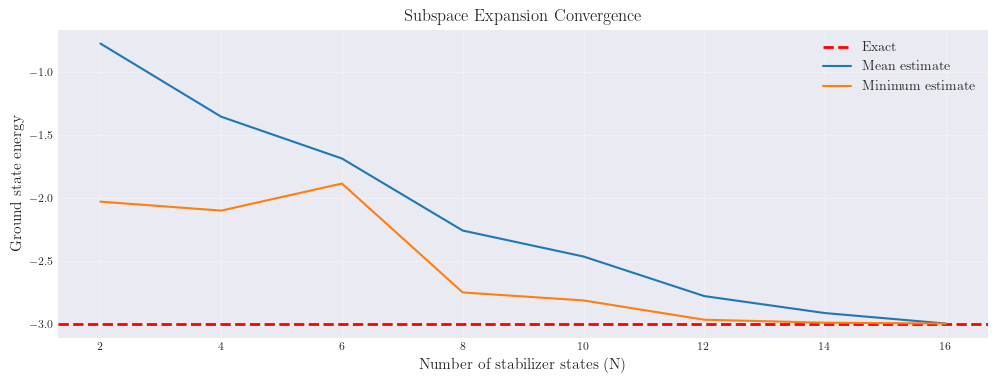

In [15]:
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
ax.axhline(exact_energies[0], color='red', linestyle='--',
            label='Exact', linewidth=2, zorder=1)
ax.plot(N_SAMPLES, mean_energies[0, :], label='Mean estimate')
ax.plot(N_SAMPLES, min_energies[0, :], label='Minimum estimate')
ax.set_xlabel('Number of stabilizer states (N)', fontsize=11)
ax.set_ylabel('Ground state energy', fontsize=11)
ax.set_title('Subspace Expansion Convergence', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)


N_SAMPLES shape: (10,)
N_SAMPLES: [ 2  4  6  8 10 12 14 16 18 20]
mean_energies shape: (10, 8)
TRANSVERSE_FIELD_STRENGTH length: 10

Using N_SAMPLES_VALID: [ 2  4  6  8 10 12 14 16]


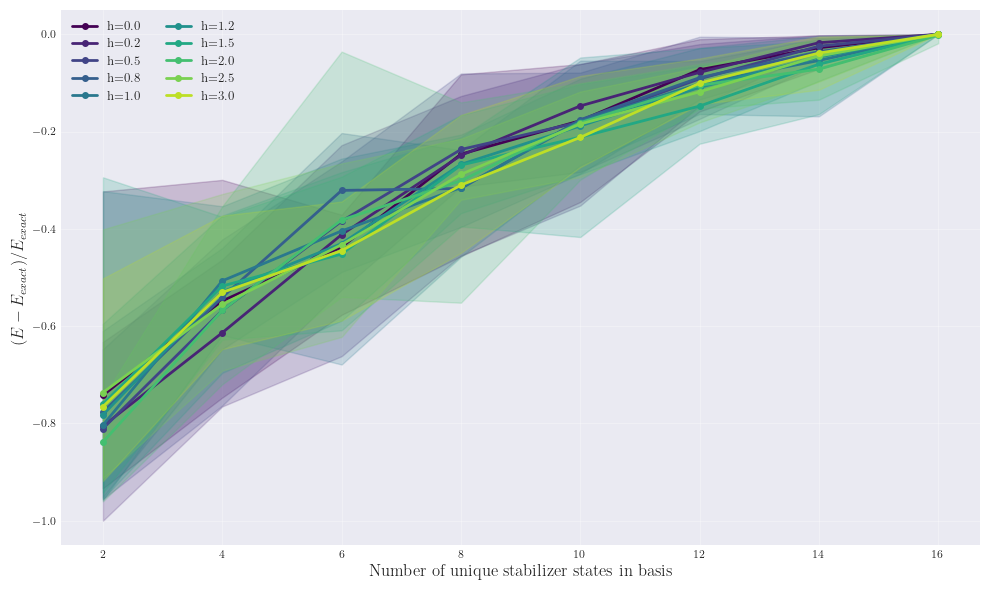

In [33]:
# Check the shapes to understand the data structure
print(f"N_SAMPLES shape: {N_SAMPLES.shape}")
print(f"N_SAMPLES: {N_SAMPLES}")
print(f"mean_energies shape: {mean_energies.shape}")
print(f"TRANSVERSE_FIELD_STRENGTH length: {len(TRANSVERSE_FIELD_STRENGTH)}")

# Use only the valid portion of N_SAMPLES that matches the data
n_valid_samples = mean_energies.shape[1]
N_SAMPLES_VALID = N_SAMPLES[:n_valid_samples]

print(f"\nUsing N_SAMPLES_VALID: {N_SAMPLES_VALID}")

# Create visualization
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Use a colormap for different h values
cmap = plt.cm.viridis
colors = [cmap(i / len(TRANSVERSE_FIELD_STRENGTH)) for i in range(len(TRANSVERSE_FIELD_STRENGTH))]

for j, h in enumerate(TRANSVERSE_FIELD_STRENGTH):
    
    # Plot mean energy with error band (min to max)
    ax.plot(N_SAMPLES_VALID, (mean_energies[j, :] - exact_energies[j]) / exact_energies[j], color=colors[j], 
            marker='o', markersize=4, label=f'h={h:.1f}', linewidth=2)
    ax.fill_between(N_SAMPLES_VALID, (min_energies[j, :] - exact_energies[j]) / exact_energies[j], (max_energies[j, :] - exact_energies[j]) / exact_energies[j], 
                     color=colors[j], alpha=0.2)

ax.set_xlabel('Number of unique stabilizer states in basis', fontsize=12)
ax.set_ylabel(r'$(E-E_{exact})/E_{exact}$', fontsize=12)
ax.legend(fontsize=9, ncol=2, loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [16]:
energies[0, :]

array([[-1.11237244, -0.35355339, -1.13389342, -0.35355339, -2.03080518,
        -0.70710678, -0.25819889, -1.20710678, -0.2       , -0.37796447],
       [-2.10213797, -1.50965369, -1.2956314 , -1.11857951, -1.45326525,
        -0.75940014, -1.83871873, -0.89563788, -0.77951589, -1.80180089],
       [-1.64439557, -1.26968658, -1.70357938, -1.78061259, -1.88699522,
        -1.82085011, -1.33380628, -1.86511345, -1.83169093, -1.74231843],
       [-2.53459776, -2.30581219, -1.63153177, -2.26359489, -2.41881916,
        -1.88989907, -2.47338105, -2.4729924 , -2.75293464, -1.86412446],
       [-2.56109281, -2.44264897, -2.29078103, -2.25540209, -2.73300502,
        -2.66320268, -1.96549165, -2.42193425, -2.52128781, -2.81645026],
       [-2.68526108, -2.78896428, -2.78500548, -2.96992044, -2.89204303,
        -2.87347552, -2.60091721, -2.92292382, -2.52399472, -2.77652391],
       [-2.78705834, -2.87393109, -2.94671924, -2.99341818, -2.96167913,
        -2.95765204, -2.94867562, -2.92118478

#### Visualise the sampling space of the stabilizer states

In [ ]:
from collections import Counter

In [59]:
TRANSVERSE_FIELD_STRENGTH = 0.0
N_SAMPLES = 1
N_RUNS = 200000

samples = []

tfim = ising_chain(n_qubits=4, h=TRANSVERSE_FIELD_STRENGTH, J=1)
matrix = pauli_terms_to_matrix(tfim)
eigs, evs = eigh(matrix)

ground_state_energy = eigs[0]
ground_state_vector = Statevector(evs[:, 0])

# for i, N in enumerate(N_SAMPLES):
for i, run in enumerate(range(N_RUNS)):
    subspace = StabilizerSubspace.from_state(ground_state_vector, n_samples=N_SAMPLES, pauli_hamiltonian=tfim)
    samples.append(subspace.states[0])

    if i % 1000 == 0:
        print(f'Collected {i} samples!')

/home/k25127283/repos/shadow-ci/src/shades/stabilizer.py:166: ComplexWarning: Casting complex values to real discards the imaginary part
  for j in range(n):
/home/k25127283/repos/shadow-ci/src/shades/stabilizer.py:698: ComplexWarning: Casting complex values to real discards the imaginary part
  local_phase *= 1j
/home/k25127283/repos/shadow-ci/src/shades/stabilizer.py:703: ComplexWarning: Casting complex values to real discards the imaginary part
  local_phase *= -1
/home/k25127283/repos/shadow-ci/src/shades/stabilizer.py:897: ComplexWarning: Casting complex values to real discards the imaginary part
  OUT:


Collected 0 samples!
Collected 1000 samples!
Collected 2000 samples!
Collected 3000 samples!
Collected 4000 samples!
Collected 5000 samples!
Collected 6000 samples!
Collected 7000 samples!
Collected 8000 samples!
Collected 9000 samples!
Collected 10000 samples!
Collected 11000 samples!
Collected 12000 samples!
Collected 13000 samples!
Collected 14000 samples!
Collected 15000 samples!
Collected 16000 samples!
Collected 17000 samples!
Collected 18000 samples!
Collected 19000 samples!
Collected 20000 samples!
Collected 21000 samples!
Collected 22000 samples!
Collected 23000 samples!
Collected 24000 samples!
Collected 25000 samples!
Collected 26000 samples!
Collected 27000 samples!
Collected 28000 samples!
Collected 29000 samples!
Collected 30000 samples!
Collected 31000 samples!
Collected 32000 samples!
Collected 33000 samples!
Collected 34000 samples!
Collected 35000 samples!
Collected 36000 samples!
Collected 37000 samples!
Collected 38000 samples!
Collected 39000 samples!
Collected 400

In [82]:
stab_counts = Counter(samples)
counts = np.array(list(stab_counts.values()))
ovlps = np.empty(len(counts), dtype=np.float64)

for i, (k, v) in enumerate(stab_counts.items()):
    fidl = ground_state_vector.data.conj().T @ k.get_statevector()
    ovlps[i] = np.real(fidl * fidl.conj())

# Sort by count (descending)
sorted_indices = np.argsort(counts)[::-1]
sorted_counts = counts[sorted_indices]
sorted_ovlps = ovlps[sorted_indices]

# Find where the exact state (max overlap) lands in the SORTED order
exact_idx_unsorted = ovlps.argmax()  # index in original array
exact_rank = np.where(sorted_indices == exact_idx_unsorted)[0][0]  # position in sorted array

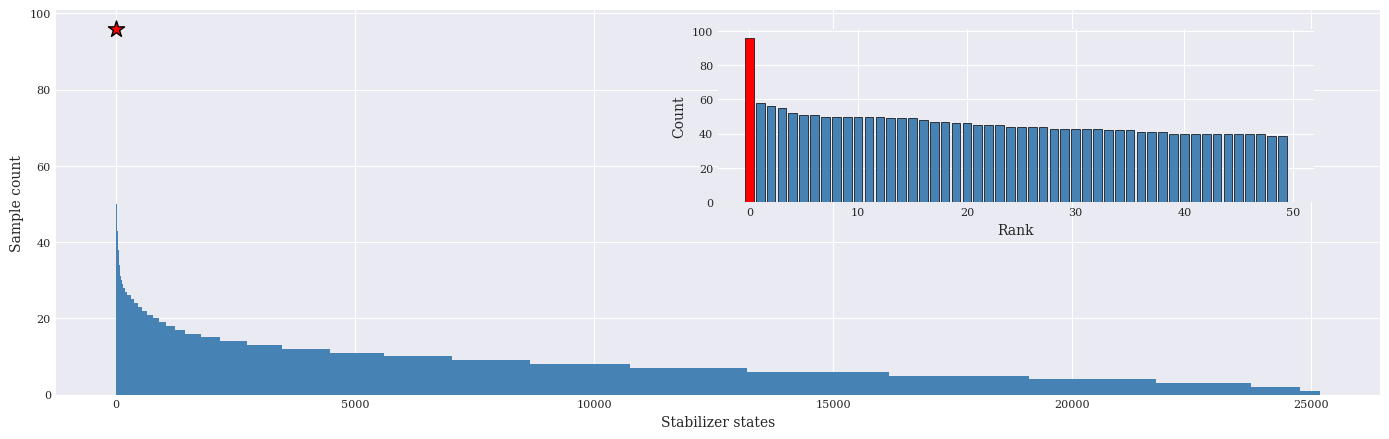

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(14, 4.5))
x_positions = np.arange(len(sorted_counts))
ax.bar(x_positions, sorted_counts, color='steelblue', width=1.0, edgecolor='none')

# Add inset showing top 50 states
axins = ax.inset_axes([0.5, 0.5, 0.45, 0.45])  # [x, y, width, height] in axis coords
top_k = 50
colors_top = ['steelblue'] * top_k
if exact_rank < top_k:
    colors_top[exact_rank] = 'red'
axins.bar(range(top_k), sorted_counts[:top_k], color=colors_top, edgecolor='black', linewidth=0.5)
axins.set_xlabel('Rank')
axins.set_ylabel('Count')

# Mark exact state in main plot
ax.scatter([exact_rank], [sorted_counts[exact_rank]], 
           color='red', s=150, zorder=5, marker='*', edgecolors='black')

ax.set_xlabel('Stabilizer states')
ax.set_ylabel('Sample count')
plt.tight_layout()
plt.show()

#### Compare with configurational basis state sampling

In [8]:
TRANSVERSE_FIELD_STRENGTH = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
N_SAMPLES = np.array([8, 12, 16, 24, 32])
N_RUNS = 20

s_energies = np.empty((len(TRANSVERSE_FIELD_STRENGTH), len(N_SAMPLES), N_RUNS))
cb_energies = np.empty((len(TRANSVERSE_FIELD_STRENGTH), len(N_SAMPLES), N_RUNS))

from scipy.linalg import eigvalsh

def diagnose_overlap_matrix(S, name="S"):
    """Print diagnostic info about an overlap matrix."""
    eigvals = eigvalsh(S)
    print(f"  {name} diagnostics:")
    print(f"    Shape: {S.shape}")
    print(f"    Eigenvalues: min={eigvals.min():.2e}, max={eigvals.max():.2e}")
    print(f"    Condition number: {eigvals.max() / max(eigvals.min(), 1e-16):.2e}")
    print(f"    # negative eigenvalues: {np.sum(eigvals < 0)}")
    print(f"    # eigenvalues < 1e-10: {np.sum(eigvals < 1e-10)}")
    return eigvals

for j, h in enumerate(TRANSVERSE_FIELD_STRENGTH):

    print(f'Running for h={h}...')

    tfim = ising_chain(n_qubits=6, h=h, J=1)
    matrix = pauli_terms_to_matrix(tfim)
    eigs, evs = eigh(matrix)

    ground_state_energy = eigs[0]
    ground_state_vector = Statevector(evs[:, 0])

    for i, N in enumerate(N_SAMPLES):

        print(f"\n--- N = {N} stabilizer states ---")
        failures = 0

        for run in range(N_RUNS):
            try:
                subspace = StabilizerSubspace.from_state(
                    ground_state_vector, n_samples=N, pauli_hamiltonian=tfim
                )
                
                # Diagnose on first run or after failure
                if run == 0 or (failures > 0 and failures < 3):
                    diagnose_overlap_matrix(subspace.S, "Stabilizer S")
                
                energy, coeffs = subspace.optimize_coefficients(reg=1e-6)
                s_energies[j, i, run] = energy
                
            except np.linalg.LinAlgError as e:
                failures += 1
                if failures <= 3:  # Only print first few failures
                    print(f"  Run {run+1} FAILED: {e}")
                    diagnose_overlap_matrix(subspace.S, "Failed S")
                continue

            subspace_cb = ComputationalSubspace.from_state(
                ground_state_vector, n_samples=N, pauli_hamiltonian=tfim
            )
            energy_cb, coeffs_cb = subspace_cb.optimize_coefficients()
            cb_energies[j, i, run] = energy_cb
            
            if run < 3:
                error = np.abs(ground_state_energy - s_energies[j, i, run])
                error_cb = np.abs(ground_state_energy - cb_energies[j, i, run])
                print(f"  Run {run+1}: Error Stab={error:.2e}, Error CB={error_cb:.2e}")
        

Running for h=0.0...

--- N = 8 stabilizer states ---
  Stabilizer S diagnostics:
    Shape: (8, 8)
    Eigenvalues: min=6.44e-01, max=1.92e+00
    Condition number: 2.97e+00
    # negative eigenvalues: 0
    # eigenvalues < 1e-10: 0


AttributeError: type object 'StabilizerState' has no attribute 'from_stim_tableau'

### Experimenting with Hubbard model

In [34]:
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.mappers import JordanWignerMapper

In [35]:
fermionic_op = FermionicOp({
    "+_0 -_2": -1.0, "+_2 -_0": -1.0,      # Hopping terms
    "+_1 -_3": -1.0, "+_3 -_1": -1.0,
    "+_0 -_0 +_1 -_1": 2.0,                # Coulomb repulsion
    "+_2 -_2 +_3 -_3": 2.0,
}, num_spin_orbitals=4)

# Convert to qubit Hamiltonian via Jordan-Wigner mapping
qubit_op = JordanWignerMapper().map(fermionic_op)
hubbard = [(coeff, label) for label, coeff in qubit_op.label_iter()]
matrix = qubit_op.to_matrix()
eigenvalues, eigenvectors = eigh(matrix)
ground_energy_exact = eigenvalues[0]
ground_state = Statevector(eigenvectors[:, 0])

In [36]:
N_SAMPLES = np.arange(2, 21, 2)
N_RUNS = 20
N_SAMPLES

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [37]:
energies = np.empty((len(N_SAMPLES), N_RUNS))
errors = np.empty((len(N_SAMPLES), N_RUNS))

for i, N in enumerate(N_SAMPLES):

    print(f"\nAttempting to sample N = {N} stabilizer states")

    for run in range(N_RUNS):
        subspace = StabilizerSubspace.from_state(sv, n_samples=N, pauli_hamiltonian=hubbard)
        energy, coeffs = subspace.optimize_coefficients(reg=1e-10)

        energies[i, run] = energy
        errors[i, run] = abs(energy - ground_energy_exact)

        if run < 3 or run == N_RUNS - 1:  # Print first 3 and last run
            print(f"  Run {run+1}/{N_RUNS}: E = {energy:.8f}, "
                    f"Error = {errors[i, run]:.2e}")
        elif run == 3:
            print(f"  ...")


Attempting to sample N = 2 stabilizer states


NameError: name 'sv' is not defined

In [ ]:
mean_energies = np.mean(energies, axis=1)
min_energies = energies.min(axis=1)
max_energies = energies.max(axis=1)

mean_energies, min_energies, max_energies

(array([ 0.50484519,  0.00608016, -0.33401617, -0.56767178, -0.77925779,
        -0.94056068, -1.11951568, -1.23606796, -1.23606798, -1.23606798]),
 array([-0.03229065, -0.37527261, -0.6475214 , -0.87114273, -0.987488  ,
        -1.08357597, -1.20698111, -1.23606798, -1.23606798, -1.23606798]),
 array([ 1.1760734 ,  0.3077509 , -0.09563588, -0.17148482, -0.37731076,
        -0.78865962, -1.01363462, -1.23606779, -1.23606797, -1.23606798]))

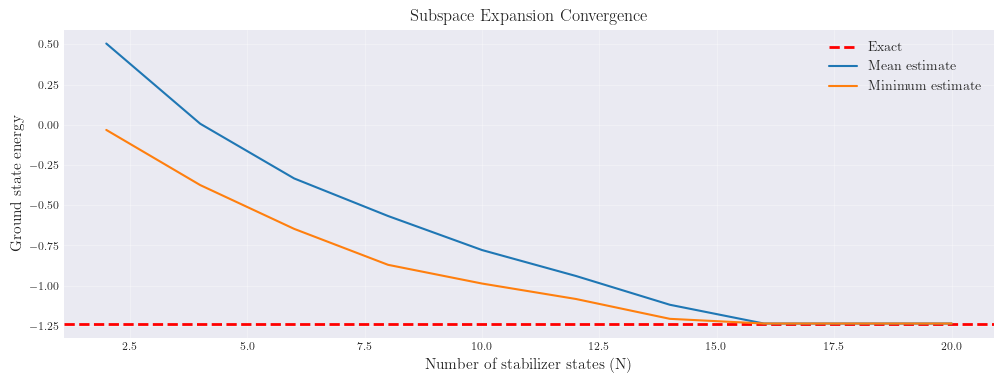

In [ ]:
fig, ax = plt.subplots(1, figsize=FIGSIZE)

# Plot 1: Energy convergence
ax.axhline(ground_energy_exact, color='red', linestyle='--',
            label='Exact', linewidth=2, zorder=1)
ax.plot(N_SAMPLES, mean_energies, label='Mean estimate')
ax.plot(N_SAMPLES, min_energies, label='Minimum estimate')
ax.set_xlabel('Number of stabilizer states (N)', fontsize=11)
ax.set_ylabel('Ground state energy', fontsize=11)
ax.set_title('Subspace Expansion Convergence', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
